In [15]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [16]:
#PROBLEM 1
#load data
rating_df = pd.read_csv('Problem 1—quality.csv')
#drop 1st column
rating_df = rating_df.iloc[: , 1:]

#preview data
rating_df.head();

In [17]:
# missing values
print(rating_df.isna().sum())

num_words            0
num_characters       0
num_misspelled       0
bin_end_qmark        0
num_interrogative    0
bin_start_small      0
num_sentences        0
num_punctuations     0
label                0
dtype: int64


In [18]:
#isolating independent features
X = rating_df.drop(['label'], axis = 1)
#isolating class label
y = rating_df['label']

# normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

#create train/test using 70% for training
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.40, random_state = 1)

In [19]:
#logistic regression model
logmodel= LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
#print results
print('LR Classification report on test data')
print(classification_report(y_test, predictions))
print('LR Accuracy on test data')
print(accuracy_score(y_test, predictions))

print('LR Confusion matrix of test data')
print(confusion_matrix(y_test, predictions))

LR Classification report on test data
              precision    recall  f1-score   support

           B       0.43      0.75      0.55         4
           G       0.80      0.50      0.62         8

    accuracy                           0.58        12
   macro avg       0.61      0.62      0.58        12
weighted avg       0.68      0.58      0.59        12

LR Accuracy on test data
0.5833333333333334
LR Confusion matrix of test data
[[3 1]
 [4 4]]


In [21]:
#logistic regression using num_mispelled and num_interrogative as independent features
#isolating independent features
X1 = rating_df[['num_misspelled', 'num_interrogative']]
#isolating class label
y1 = rating_df['label']

# normalize feature variables
from sklearn.preprocessing import StandardScaler
X1_features = X1
X1 = StandardScaler().fit_transform(X1)

#create train/test using 70% for training
X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y1, test_size = 0.40, random_state = 1)

In [22]:
#logistic regression model
logmodel= LogisticRegression()
logmodel.fit(X1_train, y1_train)

predictions1 = logmodel.predict(X1_test)

In [23]:
#print results
print('LR Classification report on test data')
print(classification_report(y1_test, predictions1, zero_division= 1))
print('LR Accuracy on test data')
print(accuracy_score(y1_test, predictions1))

print('LR Confusion matrix of test data')
print(confusion_matrix(y1_test, predictions1))

LR Classification report on test data
              precision    recall  f1-score   support

           B       0.27      0.75      0.40         4
           G       0.00      0.00      0.00         8

    accuracy                           0.25        12
   macro avg       0.14      0.38      0.20        12
weighted avg       0.09      0.25      0.13        12

LR Accuracy on test data
0.25
LR Confusion matrix of test data
[[3 1]
 [8 0]]


In [24]:
#logistic regression using num_words and num_punctuations as independent features
#isolating independent features
X2 = rating_df[['num_words', 'num_punctuations']]
#isolating class label
y2 = rating_df['label']

# normalize feature variables
from sklearn.preprocessing import StandardScaler
X2_features = X2
X2 = StandardScaler().fit_transform(X2)

#create train/test using 70% for training
X2_train, X2_test, y2_train, y2_test = train_test_split (X2, y2, test_size = 0.40, random_state = 1)

In [25]:
#logistic regression model
logmodel= LogisticRegression()
logmodel.fit(X2_train, y2_train)

predictions2 = logmodel.predict(X2_test)

In [26]:
#print results
print('LR Classification report on test data')
print(classification_report(y2_test, predictions2))
print('LR Accuracy on test data')
print(accuracy_score(y2_test, predictions2))

print('LR Confusion matrix of test data')
print(confusion_matrix(y2_test, predictions2))

LR Classification report on test data
              precision    recall  f1-score   support

           B       0.40      1.00      0.57         4
           G       1.00      0.25      0.40         8

    accuracy                           0.50        12
   macro avg       0.70      0.62      0.49        12
weighted avg       0.80      0.50      0.46        12

LR Accuracy on test data
0.5
LR Confusion matrix of test data
[[4 0]
 [6 2]]


In [27]:
#PROBLEM 2
#load data
wine_df = pd.read_csv('Problem 2—wine dataset.csv')

#preview data
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [28]:
# missing values
print(wine_df.isna().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
is_red                  0
high_quality            0
dtype: int64


In [29]:
#trial-and-error; good subset of features
import statsmodels.api as sm

cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'is_red']

X1 = wine_df[cols]
y1 = wine_df['high_quality']

logit_model=sm.Logit(y1,X1)
result=logit_model.fit()
print(result.summary())

#variables with lowest p values (not including quality): fixed_acidity, density, sulphates

         Current function value: 0.000027
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           high_quality   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6485
Method:                           MLE   Df Model:                           11
Date:                Sat, 22 Jan 2022   Pseudo R-squ.:                  0.9999
Time:                        17:01:11   Log-Likelihood:               -0.17665
converged:                      False   LL-Null:                       -3219.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
fixed_acidity           1.4214      2.344      0.606      0.544      -3.173       6.016
volatile_acidity       -5.4875     43.

/Users/laurensantos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
#load library
from sklearn.neighbors import KNeighborsClassifier

#isolating independent features, test 1
X = wine_df[['fixed_acidity', 'density', 'sulphates']]
#isolating class label
y = wine_df['high_quality']


# normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)


#create train/test using 70% for training
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.30, random_state = 2)

#create KNN Classifier model
knn = Kn



In [31]:

#KNN
from sklearn.neighbors import KNeighborsClassifier
#best accuracy parameter
best_accuracy = 0
#testing for k values 2 through 10
for i in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score = knn.score(X_train,y_train)
#comparing accuracy of k scores
    if train_score > best_accuracy:
        best_accuracy = train_score
        best_k = i

print(f'For k = {i}, accuracy is {round(train_score,3)}.')
print(f'Best k = {best_k}.')

For k = 10, accuracy is 0.838.
Best k = 2.


Text(0, 0.5, 'Accuracy')

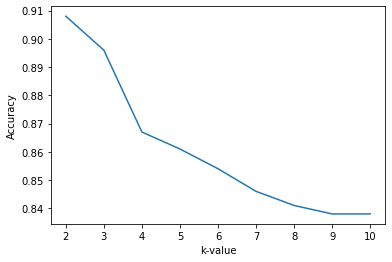

In [32]:
#plot k accuracies
y = [0.908, 0.896, 0.867, 0.861, 0.854, 0.846, 0.841, 0.838, 0.838]
x = [2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, y)

plt.xlabel('k-value')
plt.ylabel('Accuracy')